<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

This project is focused on exploratory data analysis, oft referred to as EDA. EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to pitfalls and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those beyond this class!

---

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like stackoverflow that have almost certainly done what you are trying to do.

**Get used to using google for finding code!** You will be using it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [135]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import matplotlib.pyplot as plt

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put in dictionary format.

The dictionary format for data will be keys as the column names/headers, and values as the row values for that column.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [136]:
sat_filepath = 'sat_scores.csv'


sat_dict = {}
reader_lst = []
with open(sat_filepath, mode='r') as infile:
    reader = csv.reader(infile)
    header = reader.next()
    for row in reader:
        reader_lst.append(row)
    for index in range(len(header)):
        temp = []
        for row in reader_lst:
            temp.append(row[index])
        sat_dict[header[index]] = temp

### 1.2 Make a pandas DataFrame object with the sat dictionary and also with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [137]:
sat_df_dict = pd.DataFrame(sat_dict)
sat_df_csv = pd.read_csv(sat_filepath)

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame and describe what the data appears to be. 

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [138]:
sat_df_csv.head(10)
#This data appears to list the SAT Verbal and Math absolute scores by state. The Rate field is ambiguous as it could mean
#percentage of students who take the SAT, percentage of people who are accepted to college, or percentage of students who
#score above the national average. I will choose to take it as the first option: percentage of people who take the SAT.

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

SAT Scores Data Dictionary:
    State: List all 50 states as the unique identified, plus a final row of the averages of all 50 states.
    Rate: The percentage of the group that has taken the SAT. (over a time period which is not given)
    Verbal: The raw average SAT score for each group in the Verbal section.
    Math: The raw average SAT score for each group in the Math section.

In [139]:
sat_df_csv.shape

(52, 4)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

Axes(0.125,0.125;0.775x0.775)


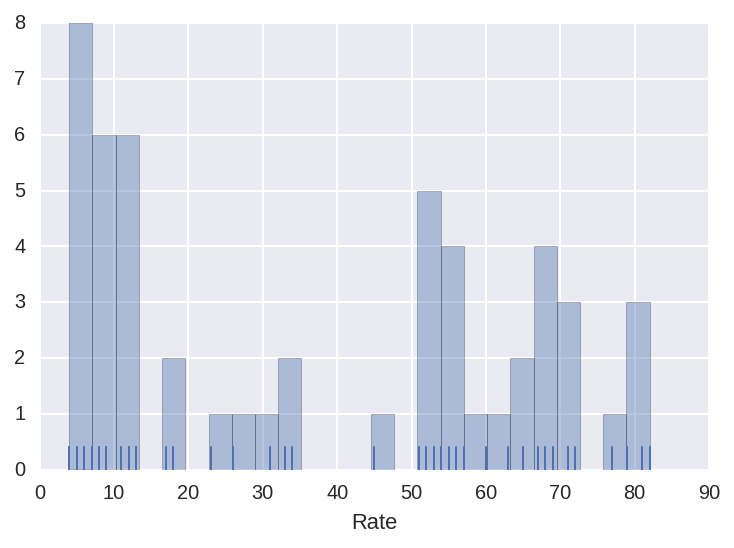

In [140]:
import seaborn as sns

print sns.distplot(sat_df_csv['Rate'],bins=25,kde=False,rug=True)

Axes(0.125,0.125;0.775x0.775)
Axes(0.125,0.125;0.775x0.775)


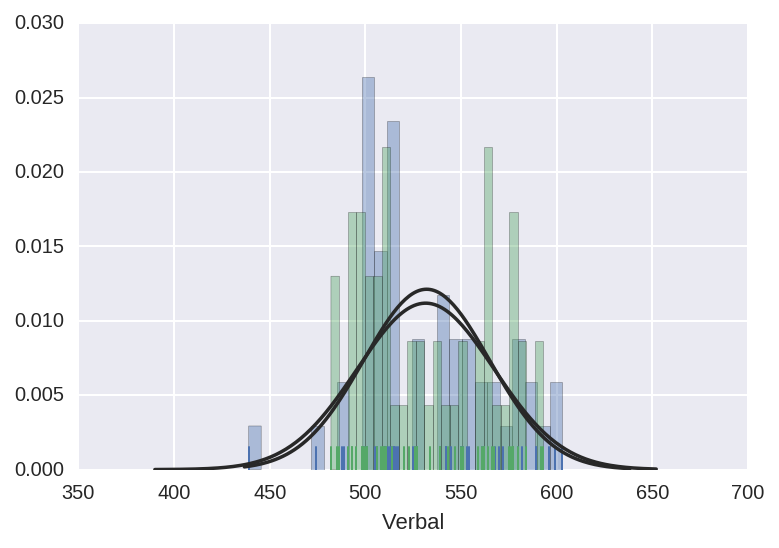

In [141]:
print sns.distplot(sat_df_csv['Math'],bins=25,kde=False,rug=True,fit=stats.norm)
print sns.distplot(sat_df_csv['Verbal'],bins=25,kde=False,rug=True,fit=stats.norm)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

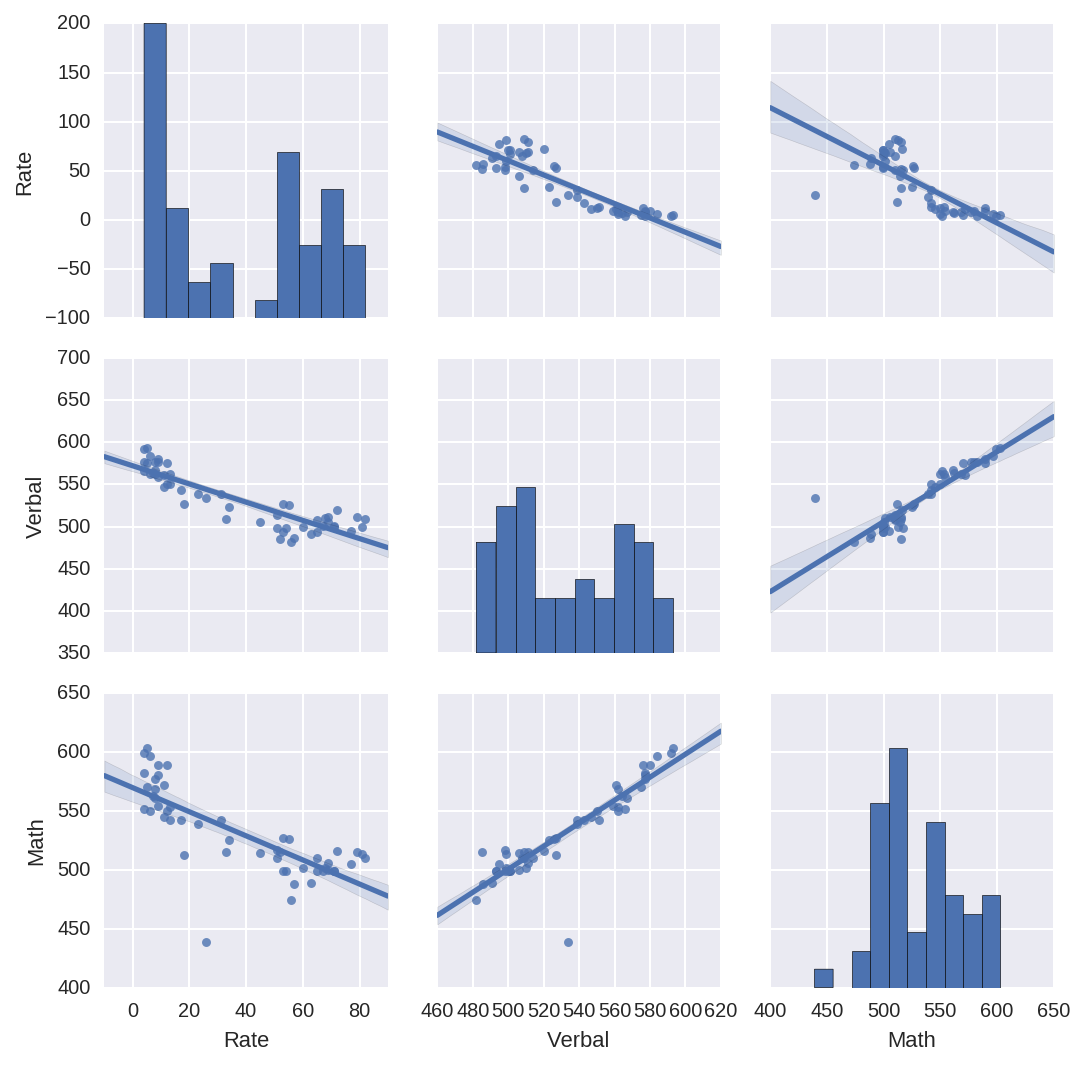

In [142]:
print sns.pairplot(sat_df_csv,kind='reg')

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built in plotting functions for your data. Read the documentation here to overview and understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

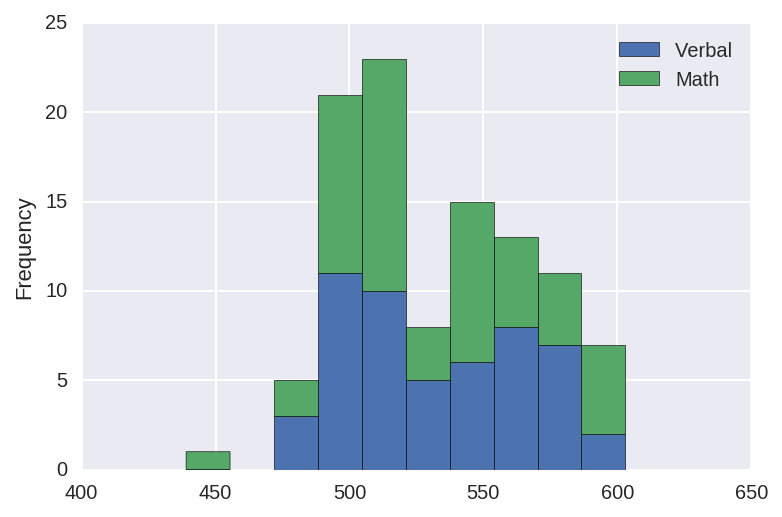

In [143]:
sat_df_csv[['Verbal','Math']].plot(kind='hist',stacked=True)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

Axes(0.125,0.125;0.775x0.775)


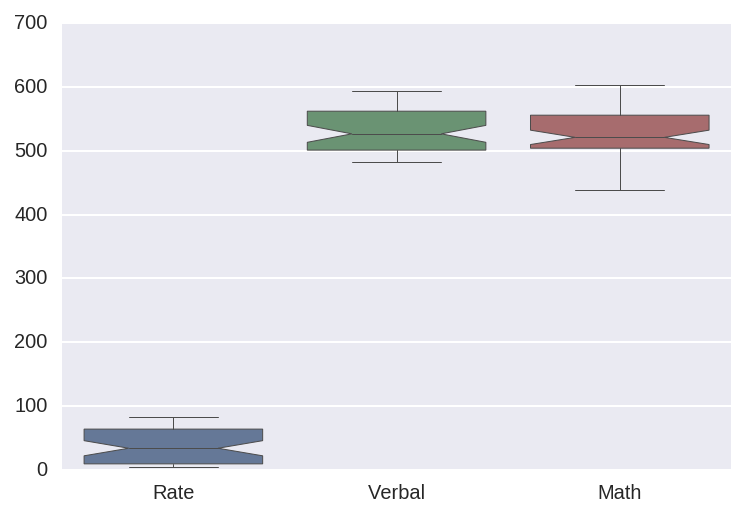

In [144]:
print sns.boxplot(sat_df_csv, orient = 'v', fliersize=2, linewidth=.5, notch=True,saturation=.5)

In [145]:
# Due to the Rate variable being a percentage and the score variables being an absolute number, the scales are completely
# different. This makes it hard to see the granular data within each boxplot if plotted on the same axis.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


Axes(0.125,0.125;0.775x0.775)


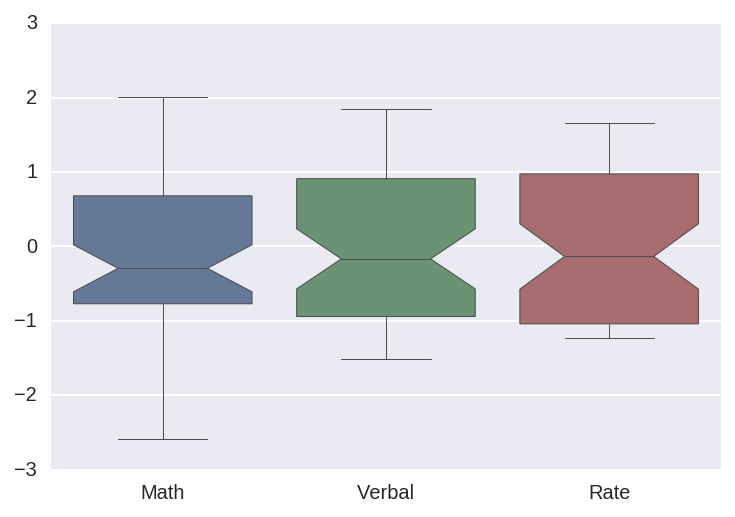

In [163]:
sat_norm = (sat_df_csv - np.mean(sat_df_csv))/np.std(sat_df_csv)
print sns.boxplot(sat_norm.loc[:,['Math','Verbal','Rate']], orient = 'v', fliersize=2, linewidth=.5, notch=True,saturation=.5)

In [ ]:
# By normalizing the variables (subtracting the mean and dividing by std. dev.) we can fit all the values to have a mean
# of 0 and a std. dev. of 1. This allows us to place all three variables on the same axis without have radically different
# values.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Recall that masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [147]:
verb_mean_mask = sat_df_csv['Verbal']>sat_df_csv.loc[51,'Verbal']
print sat_df_csv[verb_mean_mask]
print "Number of States with Verbal scores higher than the national average: ", len(sat_df_csv[verb_mean_mask])

   State  Rate  Verbal  Math
0     CT    82     509   510
2     MA    79     511   515
4     NH    72     520   516
7     VT    69     511   506
9     VA    68     510   501
11    MD    65     508   510
17    OR    55     526   526
19    WA    53     527   527
22    AK    51     514   510
24    AZ    34     523   525
25    NV    33     509   515
26    CO    31     539   542
27    OH    26     534   439
28    MT    23     539   539
29    WV    18     527   512
30    ID    17     543   542
31    TN    13     562   553
32    NM    13     551   542
33    IL    12     576   589
34    KY    12     550   550
35    WY    11     547   545
36    MI    11     561   572
37    MN     9     580   589
38    KS     9     577   580
39    AL     9     559   554
40    NE     8     562   568
41    OK     8     567   561
42    MO     8     577   577
43    LA     7     564   562
44    WI     6     584   596
45    AR     6     562   550
46    UT     5     575   570
47    IA     5     593   603
48    SD     4

In [168]:
# As 72% of the groups are above the mean, it would imply the 14 groups below the mean have higher deviations from the 
# mean to account for the mean value. It also denotes a left skewed distribution as the median is higher than the mean.

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [148]:
verb_median_mask = sat_df_csv['Verbal']>np.median(sat_df_csv[1:51])
print sat_df_csv[verb_median_mask]

   State  Rate  Verbal  Math
19    WA    53     527   527
26    CO    31     539   542
27    OH    26     534   439
28    MT    23     539   539
29    WV    18     527   512
30    ID    17     543   542
31    TN    13     562   553
32    NM    13     551   542
33    IL    12     576   589
34    KY    12     550   550
35    WY    11     547   545
36    MI    11     561   572
37    MN     9     580   589
38    KS     9     577   580
39    AL     9     559   554
40    NE     8     562   568
41    OK     8     567   561
42    MO     8     577   577
43    LA     7     564   562
44    WI     6     584   596
45    AR     6     562   550
46    UT     5     575   570
47    IA     5     593   603
48    SD     4     577   582
49    ND     4     592   599
50    MS     4     566   551


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [149]:
sat_df_csv['Verbal - Math'] = sat_df_csv['Verbal'] - sat_df_csv['Math']
sat_df_csv.head()

,State,Rate,Verbal,Math,Verbal - Math
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [170]:
sat_subset_desc = sat_df_csv.sort_values(by=['Verbal - Math'],ascending=False)[:11]
sat_subset_asc = sat_df_csv.sort_values(by=['Verbal - Math'],ascending=True)[:11]
print sat_subset_desc.head(3)
print sat_subset_asc.head(3)

   State  Rate  Verbal  Math  Verbal - Math
27    OH    26     534   439             95
50    MS     4     566   551             15
29    WV    18     527   512             15
   State  Rate  Verbal  Math  Verbal - Math
21    HI    52     485   515            -30
23    CA    51     498   517            -19
1     NJ    81     499   513            -14


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [151]:
sat_df_csv.corr()
# This matrix shows how interrelated the variables are with each other while removing the impact the variances could have.
# Here we can see that Math and Verbal are highly positively correlated, meaning that when one goes up, the other will
# by almost the same amount. A corr of 1 would mean the variables are perfectly correlated, which is why a variable
# always has a correlation index of 1 with itself.

,Rate,Verbal,Math,Verbal - Math
Rate,1.000000,-0.886432,-0.773746,-0.101412
Verbal,-0.886432,1.000000,0.899871,0.052600
Math,-0.773746,0.899871,1.000000,-0.388219
Verbal - Math,-0.101412,0.052600,-0.388219,1.000000


### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [152]:
sat_df_csv.describe()

,Rate,Verbal,Math,Verbal - Math
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [153]:
sat_cov = sat_df_csv.cov()
print sat_cov

                     Rate       Verbal         Math  Verbal - Math
Rate           745.387632  -804.355958  -760.803922     -43.552036
Verbal        -804.355958  1104.646682  1077.147059      27.499623
Math          -760.803922  1077.147059  1297.078431    -219.931373
Verbal - Math  -43.552036    27.499623  -219.931373     247.430995


In [ ]:
# The covariance is similar to the correlation except it does not remove the impacts of the variables' variances.
# To convert a covariance into a correlation, you must divide by the 'combined' variance of the two variables. I.e. if
# the variance of one variable is the std. dev. squared, the combined variance is the std. dev. of one variable times the
# std. dev. of the other variable. The reason correlation is preferred to covariance is for this reason. Being able to 
# control as many factors as possible allows us to focus in on the specific metrics and relationships we want to see and
# be able to explain those metrics as much as possible.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets. The drug use dataset has many more variables than the sat dataset. The process for this dataset is more open-ended than the sat dataset.

You should use the techniques you applied above to practice more self-guided EDA here!

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [154]:
drug_data_filepath = 'drug-use-by-age.csv'
drug_df = pd.read_csv(drug_data_filepath)
print drug_df.info()
drug_df
#We see that while all columns should be numerical, there are some listed as 'objects'. This would mean there needs to be 
#some cleaning and casting of data so we can do some EDA on all columns. Since there are only 17 rows we can take a look at 
#most of the df and we see that some values are listed as '-', most likely to represent either zeros or null values. We
#will have to decide how to interpret those.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


### 7.2 Do a high-level, initial overview of the data

 and take a look at the column variables. Get a feel for what this dataset is all about. The code you use to do this is "up to you", as in you will apply processes you have learned above.

The final response to this question should be a written description of what you deduce and infer the dataset to describe. 

In [192]:
#this cleans the data by converting all response variables to floats and assumes all '-'s are null values and so changed
#NaNs. We will still be able to calculate EDA stats on the non-null values and so shouldn't lose any data.
drug_df.iloc[:,3:] = drug_df.iloc[:,3:].apply(pd.to_numeric,axis=0,errors='coerce')
drug_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          16 non-null float64
crack-use                  17 non-null float64
crack-frequency            14 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           16 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         16 non-null float64
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycont

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,NaN,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,NaN,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,NaN,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


                 n  alcohol-use  alcohol-frequency  marijuana-use  \
count    17.000000    17.000000          17.000000      17.000000   
mean   3251.058824    55.429412          33.352941      18.923529   
std    1297.890426    26.878866          21.318833      11.959752   
min    2223.000000     3.900000           3.000000       1.100000   
25%    2469.000000    40.100000          10.000000       8.700000   
50%    2798.000000    64.600000          48.000000      20.800000   
75%    3058.000000    77.500000          52.000000      28.400000   
max    7391.000000    84.200000          52.000000      34.000000   

       marijuana-frequency  cocaine-use  cocaine-frequency  crack-use  \
count            17.000000    17.000000          16.000000  17.000000   
mean             42.941176     2.176471           7.875000   0.294118   
std              18.362566     1.816772           8.038449   0.235772   
min               4.000000     0.000000           1.000000   0.000000   
25%          

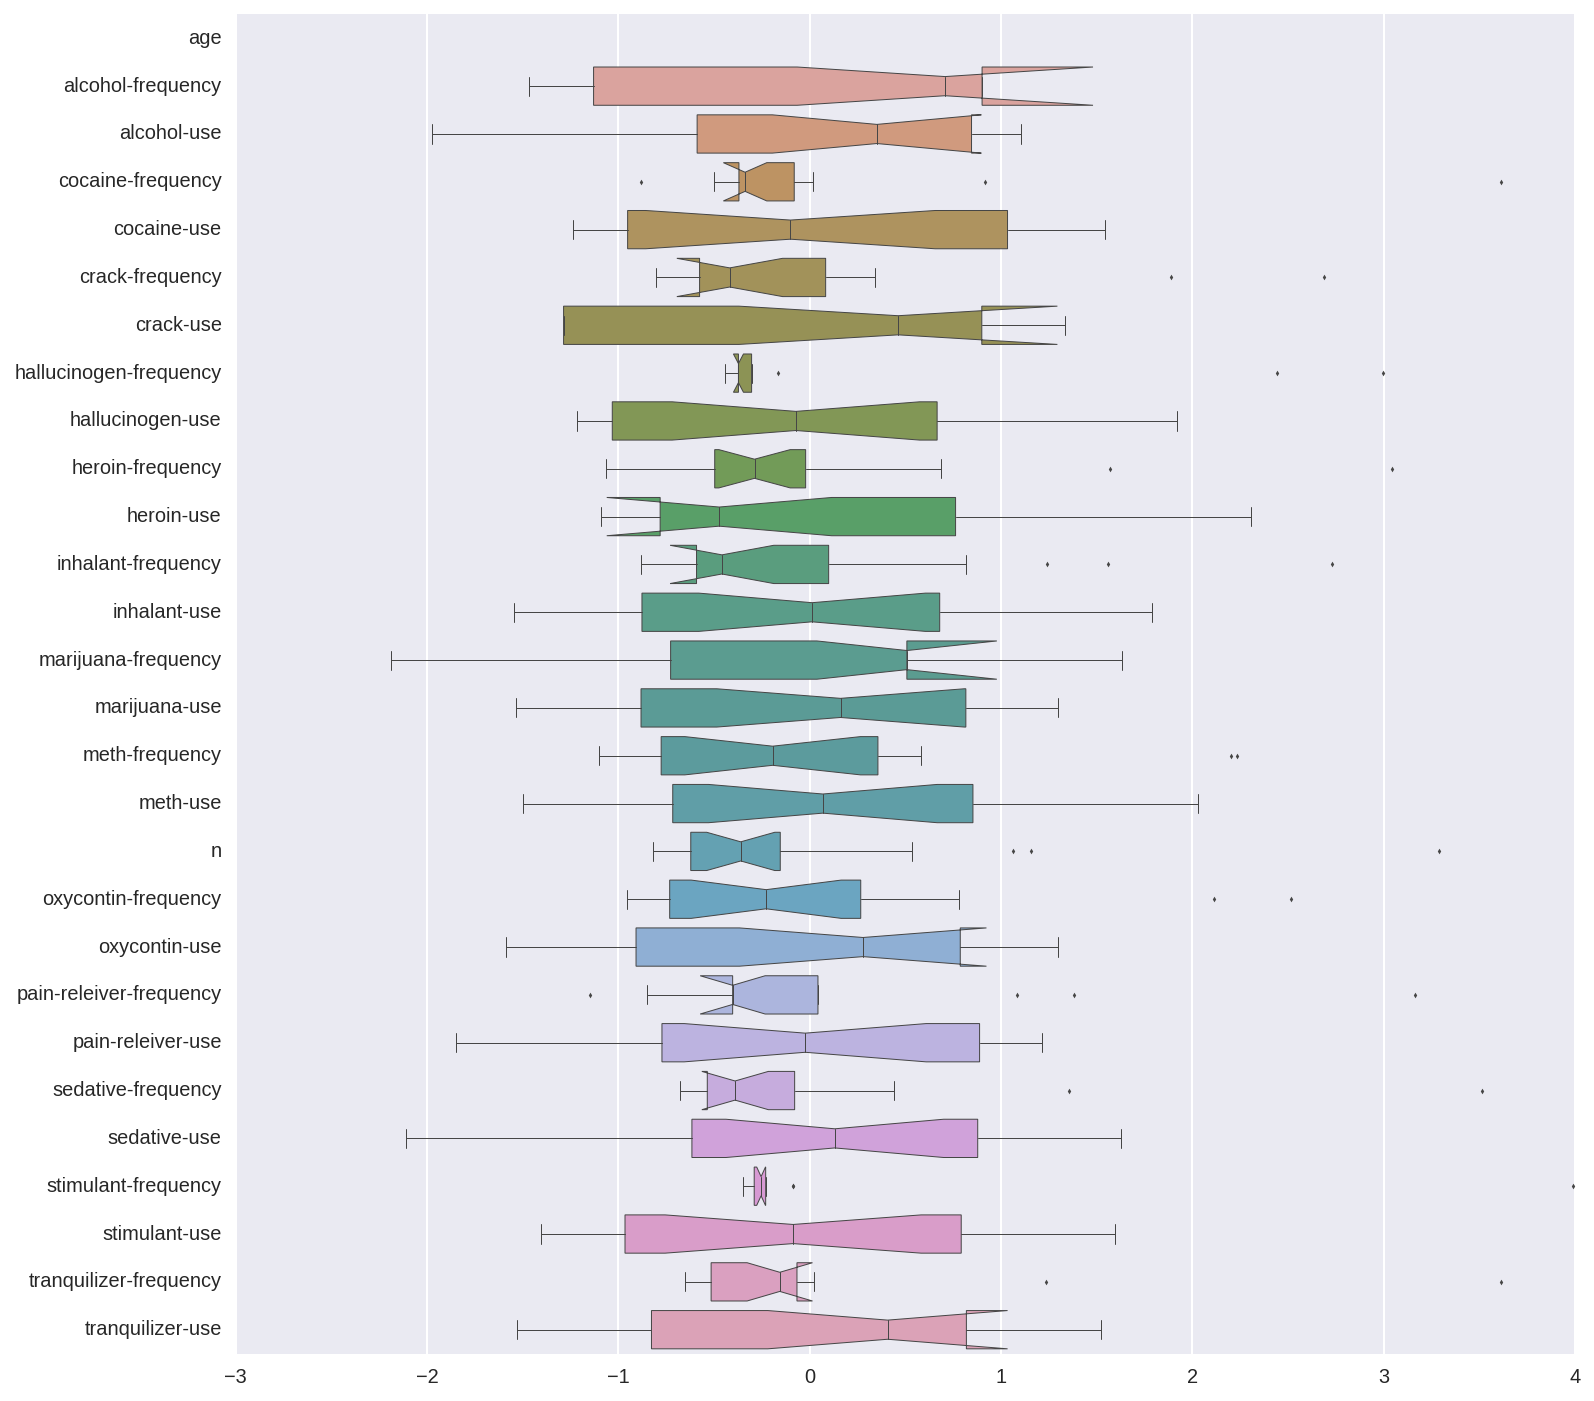

In [156]:
print drug_df.describe() #initial EDA stats
drug_norm = (drug_df - np.mean(drug_df))/np.std(drug_df)#normalizes all columns to ensure similar scaling in plots
fig = plt.figure(figsize=(12,12))
ax = fig.gca()
print sns.boxplot(drug_norm, orient = 'h', fliersize=2, linewidth=.5, notch=True,saturation=.5,ax=ax) #creates boxplots

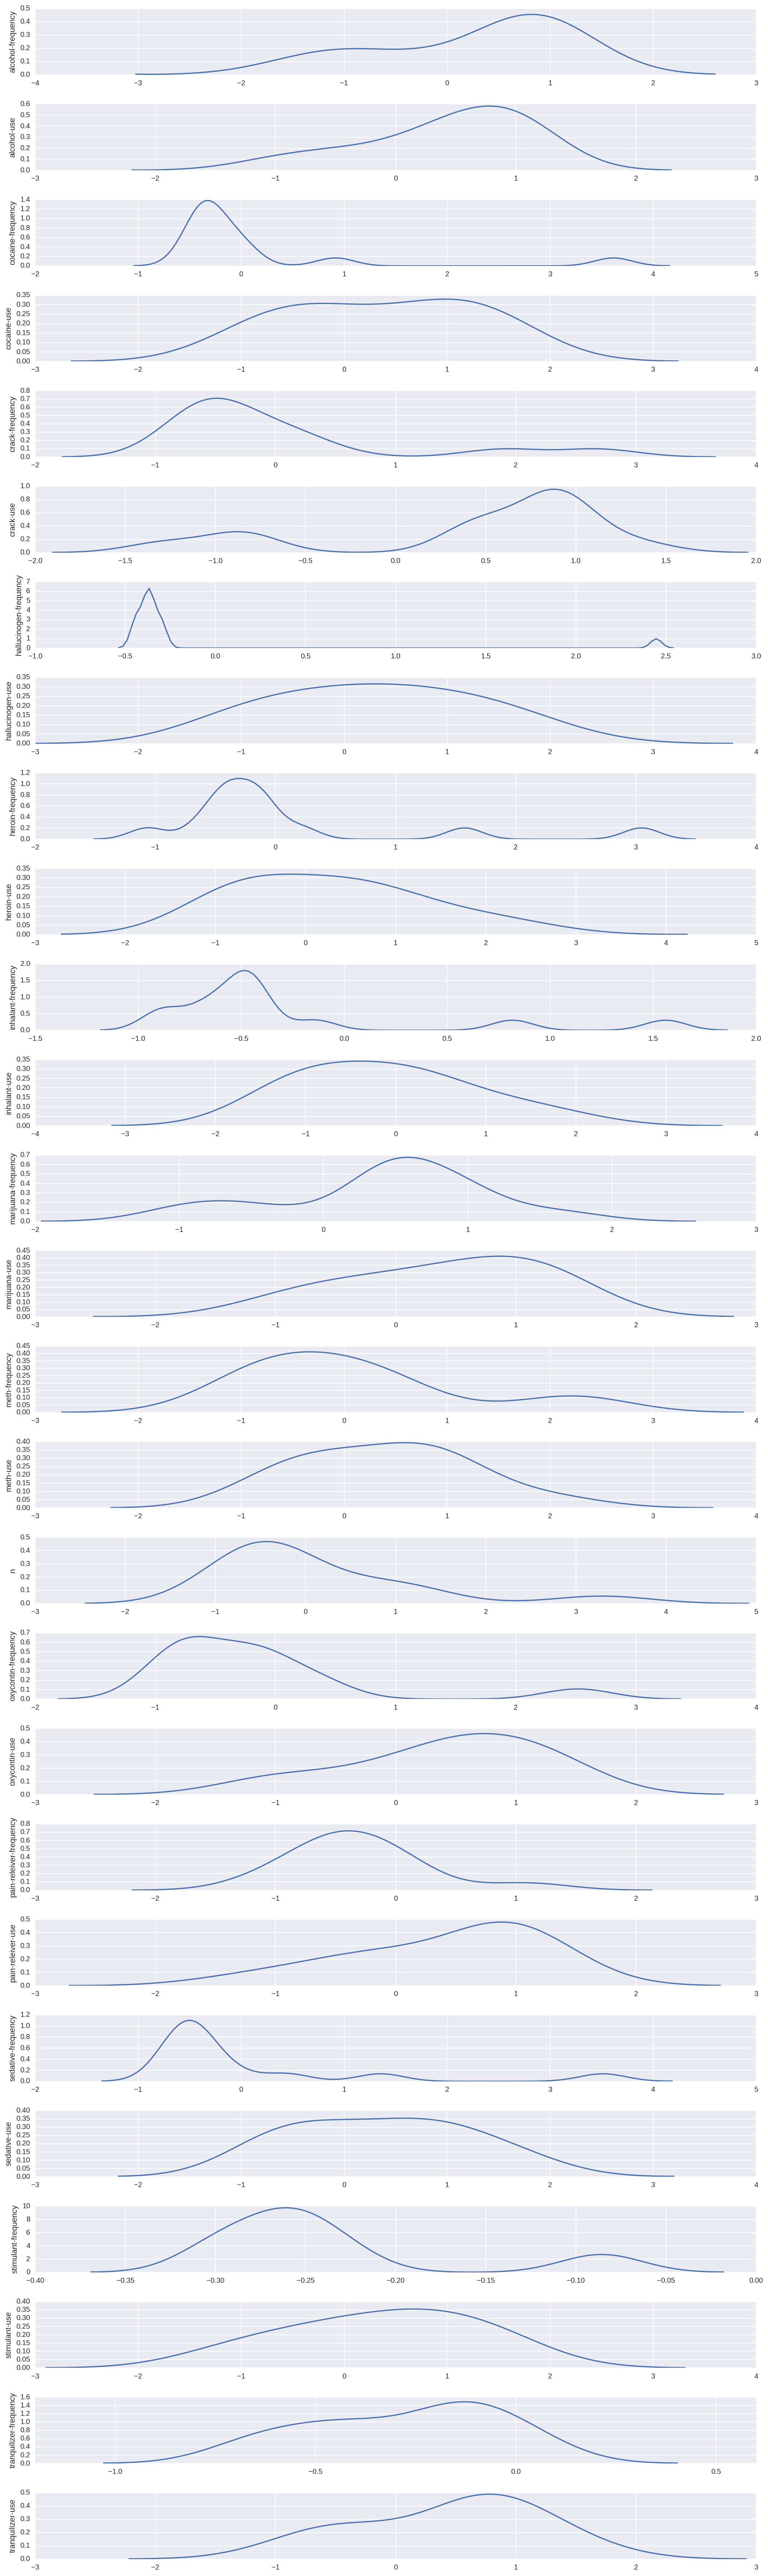

In [157]:
#plots the normalized estimated distribution of all drug uses and frequencies. I wanted to put them in two columns with
#subplots but that seems to require creating a numpy array to pass into it which is still a little too much for me.
fig, axarr = plt.subplots(drug_norm.shape[1]-1, figsize=(15,50), sharex=False, sharey=False)

for i in range(0,drug_norm.shape[1]-1):
    axarr[i] = sns.distplot(drug_norm.iloc[:,1:].dropna().iloc[:,i].values, hist=False, kde=True, ax=axarr[i], bins=15)
    axarr[i].set_ylabel(drug_norm.columns[i+1])
plt.tight_layout()

In [158]:
drug_df.corr() #creates the correlation matrix

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
n,1.000000,0.310512,0.313431,-0.169007,0.135597,-0.021565,0.365386,0.281797,0.548114,0.007798,...,-0.166039,-0.024438,-0.071086,-0.102301,-0.201621,-0.114792,-0.063571,0.485909,-0.119997,0.256701
alcohol-use,0.310512,1.000000,0.897889,0.594165,0.920425,0.773458,0.254042,0.877378,0.202732,0.677614,...,0.589219,-0.052126,0.735785,-0.550501,0.582241,-0.028115,0.682531,0.282820,0.318268,0.091251
alcohol-frequency,0.313431,0.897889,1.000000,0.260219,0.818769,0.577601,0.391981,0.785050,0.333935,0.546194,...,0.251554,0.119852,0.448543,-0.415026,0.291766,0.260304,0.425153,0.253725,0.029867,0.201423
marijuana-use,-0.169007,0.594165,0.260219,1.000000,0.615610,0.883789,-0.273950,0.620670,-0.476095,0.711613,...,0.971733,-0.323519,0.935199,-0.401769,0.968096,-0.389145,0.870446,0.014585,0.616766,-0.277144
marijuana-frequency,0.135597,0.920425,0.818769,0.615610,1.000000,0.742598,0.250348,0.892077,0.113860,0.631789,...,0.609618,0.040880,0.768339,-0.591449,0.561246,-0.069454,0.664280,0.317099,0.399124,0.048777
cocaine-use,-0.021565,0.773458,0.577601,0.883789,0.742598,1.000000,-0.163922,0.835727,-0.339153,0.899944,...,0.865626,-0.075193,0.920430,-0.294905,0.923954,-0.309286,0.889353,0.043154,0.461914,-0.159997
cocaine-frequency,0.365386,0.254042,0.391981,-0.273950,0.250348,-0.163922,1.000000,0.250877,0.875558,-0.206298,...,-0.276995,-0.236768,-0.191929,-0.144951,-0.345279,0.817772,-0.189141,0.172758,-0.126690,0.773808
crack-use,0.281797,0.877378,0.785050,0.620670,0.892077,0.835727,0.250877,1.000000,0.173208,0.750790,...,0.603003,0.056195,0.772651,-0.345668,0.618008,-0.294260,0.694324,0.281240,0.438421,0.091676
crack-frequency,0.548114,0.202732,0.333935,-0.476095,0.113860,-0.339153,0.875558,0.173208,1.000000,-0.417148,...,-0.529659,-0.195650,-0.420309,-0.233501,-0.511014,0.903993,-0.395273,0.261224,-0.060603,0.611218
heroin-use,0.007798,0.677614,0.546194,0.711613,0.631789,0.899944,-0.206298,0.750790,-0.417148,1.000000,...,0.775321,0.039657,0.818583,-0.175464,0.808024,-0.277996,0.816620,-0.078088,0.333649,-0.023708


In [159]:
#The original data is actually already an aggregated view of different drug frequency and use by age group. There is an 
#immediate definition question of what the difference between 'frequency' and 'use' is and on what scale both are on. 
#For example,when the .describe() function shows that average alcohol use across all age groups is ~55, that could mean 
#drinks/day,drinks/week, etc. It could also not have anything to do with time and more 'severity', i.e. how strong their 
#alcohol use is (one beer, one shot, one bottle?). The data dictionary below is how we interpret these variables going
#forward.

#The boxplots show the normalized data on the same scale and we can see there are some drugs with very high deviations
#(marijuana, meth, etc.) and some with extremely narrow ranges of use/frequency (cocaine, crack). Interestingly, there
#does not seem to be a correlation pattern across drugs between use and frequency, as some have high negative correlations
#(tranq), some have high positive correlations (alcohol), and some don't seem to really be correlated (cocaine).

Drug Panda Data Dictionary:
    age: Age of group
    n: Number of data points collected for drug use for each age group
    alcohol-use: Percentage of age group that 'uses' alcohol (defined to be at least once/week)
    alcohol-frequency: Average number of weeks per year age group consumes alcohol
    marijuana-use: Percentage of age group that 'uses' marijuana (defined to be at least once/week)
    marijuana-frequency: Average number of weeks per year age group consumes marijuana
    cocaine-use: Percentage of age group that 'uses' cocaine (defined to be at least once/week)
    cocaine-frequency: Average number of weeks per year age group consumes cocaine
    crack-use: Percentage of age group that 'uses' crack (defined to be at least once/week)
    crack-frequency: Average number of weeks per year age group consumes crack
    heroin-use: Percentage of age group that 'uses' heroin (defined to be at least once/week)
    heroin-frequency: Average number of weeks per year age group consumes heroin
    hallucinogen-use: Percentage of age group that 'uses' hallucinogens (defined to be at least once/week)
    hallucinogen-frequency: Average number of weeks per year age group consumes hallucinogens
    inhalant-use: Percentage of age group that 'uses' inhalants (defined to be at least once/week)
    inhalant-frequency: Average number of weeks per year age group consumes inhalants
    pain-releiver-use: Percentage of age group that 'uses' pain relievers (defined to be at least once/week)
    pain-releiver-frequency: Average number of weeks per year age group consumes pain relievers
    oxycontin-use: Percentage of age group that 'uses' oxycontin (defined to be at least once/week)
    oxycontin-frequency: Average number of weeks per year age group consumes oxycontin
    tranquilizer-use: Percentage of age group that 'uses' tranqs (defined to be at least once/week)
    tranquilizer-frequency: Average number of weeks per year age group consumes tranqs
    stimulant-use: Percentage of age group that 'uses' stimulants (defined to be at least once/week)
    stimulant-frequency: Average number of weeks per year age group consumes stimulants
    meth-use: Percentage of age group that 'uses' meth (defined to be at least once/week)
    meth-frequency: Average number of weeks per year age group consumes meth
    sedative-use: Percentage of age group that 'uses' sedatives (defined to be at least once/week)
    sedative-frequency: Average number of weeks per year age group consumes sedatives

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

In [160]:
#We would like to answer the question: "Is the average use of marijuana equal to alcohol use across all ages?"
#We will perform a t-test with an alpha of .05 as that is the norm in frequenist stats. 
#H0: mean(marijuana_use) - mean(alcohol_use) = 0
#H1: mean(marijuana_use) - mean(alcohol_use) != 0

Alpha of .05 and P-Value of  1.4171567091e-05
Test shows significant difference between marijuana and alcohol use averages. Reject null.


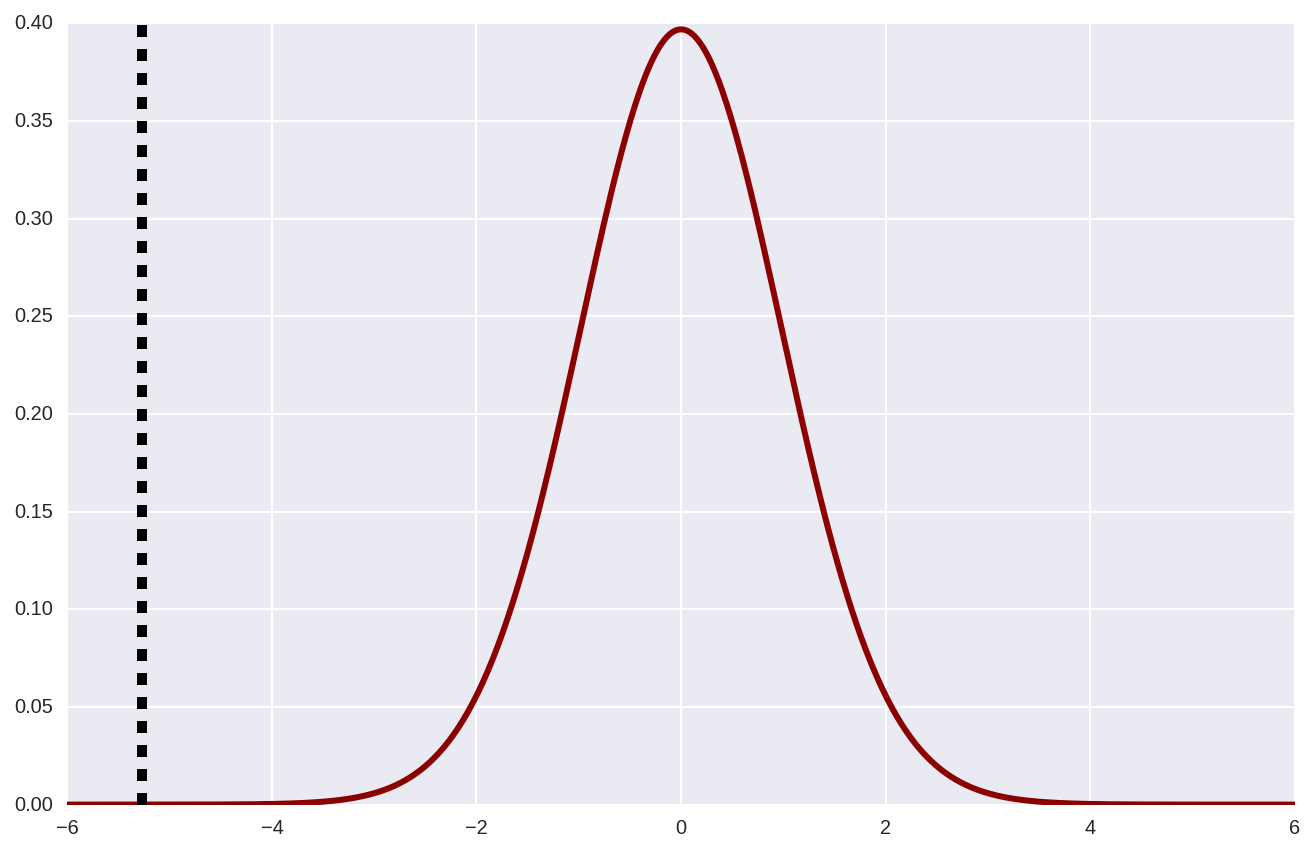

In [161]:
#Step 1: Separate the two groups and calculate means and variances
mar_grp = drug_df['marijuana-use']
alc_grp = drug_df['alcohol-use']
ave_mar = np.mean(mar_grp)
ave_alc = np.mean(alc_grp)
var_mar = np.var(mar_grp)
var_alc = np.var(alc_grp)
#Step 2: Calculate the t-statistic
hyp_t = (ave_mar - ave_alc)/np.sqrt((var_mar/len(mar_grp))+(var_alc/len(alc_grp)))
#Step 3: Plot student t dist with calculated t stat overlayed
xpoints = np.linspace(-6, 6, 500)
ypoints = stats.t.pdf(xpoints, 50, 0, 1)
fig = plt.figure(figsize=(11,7))
ax = fig.gca()
ax.plot(xpoints, ypoints, linewidth=3, color='darkred')
ax.axvline(hyp_t, color='black', linestyle='--', lw=5)
#Step 4: check significance with t-test and compare with alpha
t_test = stats.ttest_ind(mar_grp, alc_grp)
if t_test[1] < .05:
    print "Alpha of .05 and P-Value of ", t_test[1]
    print "Test shows significant difference between marijuana and alcohol use averages. Reject null."
else:
    print "Alpha of .05 and P-Value of ", t_test[1] 
    print "Test does not show significant difference between marijuana and alcohol use averages. Fail to reject null."

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 9. Covariance and correlation

---

### 9.1 Return to the sat dataset

**Go back to the sat dataset.**

1. Create the covariance matrix for the non-State variables. There are pandas and numpy functions that can do this.
2. What is the difference between the covariance and correlation matrix?
3. Why is the correlation matrix preferred to the covariance matrix for EDA?

In [172]:
sat_df_csv.cov()

,Rate,Verbal,Math,Verbal - Math
Rate,745.387632,-804.355958,-760.803922,-43.552036
Verbal,-804.355958,1104.646682,1077.147059,27.499623
Math,-760.803922,1077.147059,1297.078431,-219.931373
Verbal - Math,-43.552036,27.499623,-219.931373,247.430995


<img src="http://imgur.com/gGrau8s.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9.2 Deeper into covariance and correlation

1. How is the covariance matrix calculated?
2. How is the correlation matrix calculated?
3. Based on the explicit formulas, what is the primary differences between the two? 



In [174]:
drug_df.cov()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
n,1.684520e+06,10832.454412,8672.477941,-2623.407721,3231.628676,-50.848529,3886.733333,86.231618,13952.631868,3.377941,...,-131.070956,-413.883333,-161.769118,-1524.952206,-368.363603,-12809.040441,-21.680147,21171.742857,-21.492647,8273.788603
alcohol-use,1.083245e+04,722.473456,514.513971,191.003015,454.289338,37.770110,56.591667,5.560184,84.153297,6.078971,...,9.632647,-18.487500,34.676691,-169.944853,22.030074,-64.970221,4.820551,224.716905,1.180551,60.909926
alcohol-frequency,8.672478e+03,514.513971,454.492647,66.347426,320.522059,22.371324,67.591667,3.945956,119.607143,3.886397,...,3.261765,32.904167,16.766544,-101.619485,8.755882,477.101103,2.381618,167.861905,0.087868,106.637868
marijuana-use,-2.623408e+03,191.003015,66.347426,143.035662,135.195221,19.203088,-25.139167,1.750147,-89.565110,2.840551,...,7.068493,-47.267083,19.611103,-55.187132,16.298309,-400.128676,2.735441,4.942619,1.017941,-82.312684
marijuana-frequency,3.231629e+03,454.289338,320.522059,135.195221,337.183824,24.773529,37.983333,3.862132,32.208791,3.872059,...,6.808456,9.875000,24.737868,-124.735294,14.507353,-109.647059,3.205147,164.607143,1.011397,22.242647
cocaine-use,-5.084853e+01,37.770110,22.371324,19.203088,24.773529,3.300662,-2.351667,0.357978,-10.304945,0.545699,...,0.956507,-1.717500,2.932022,-6.153493,2.362941,-48.308824,0.424559,2.405714,0.115809,-7.218566
cocaine-frequency,3.886733e+03,56.591667,67.591667,-25.139167,37.983333,-2.351667,64.616667,0.465000,135.798077,-0.550000,...,-1.284167,-24.358333,-2.580833,-13.662500,-3.778333,39.745833,-0.382500,45.752381,-0.123333,159.370833
crack-use,8.623162e+01,5.560184,3.945956,1.750147,3.862132,0.357978,0.465000,0.055588,0.659341,0.059081,...,0.086471,0.165833,0.319412,-0.936029,0.205110,-5.964706,0.043015,2.001190,0.014265,0.536765
crack-frequency,1.395263e+04,84.153297,119.607143,-89.565110,32.208791,-10.304945,135.798077,0.659341,328.017857,-2.546703,...,-5.103846,-46.686813,-11.242857,-21.858516,-12.098352,98.737637,-1.606044,156.141484,-0.135165,303.717033
heroin-use,3.377941e+00,6.078971,3.886397,2.840551,3.872059,0.545699,-0.550000,0.059081,-2.546703,0.111397,...,0.157390,0.168333,0.479044,-0.672610,0.379632,-7.977022,0.071618,-0.835952,0.015368,-0.196507


In [175]:
drug_df.corr()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
n,1.000000,0.310512,0.313431,-0.169007,0.135597,-0.021565,0.365386,0.281797,0.548114,0.007798,...,-0.166039,-0.024438,-0.071086,-0.102301,-0.201621,-0.114792,-0.063571,0.485909,-0.119997,0.256701
alcohol-use,0.310512,1.000000,0.897889,0.594165,0.920425,0.773458,0.254042,0.877378,0.202732,0.677614,...,0.589219,-0.052126,0.735785,-0.550501,0.582241,-0.028115,0.682531,0.282820,0.318268,0.091251
alcohol-frequency,0.313431,0.897889,1.000000,0.260219,0.818769,0.577601,0.391981,0.785050,0.333935,0.546194,...,0.251554,0.119852,0.448543,-0.415026,0.291766,0.260304,0.425153,0.253725,0.029867,0.201423
marijuana-use,-0.169007,0.594165,0.260219,1.000000,0.615610,0.883789,-0.273950,0.620670,-0.476095,0.711613,...,0.971733,-0.323519,0.935199,-0.401769,0.968096,-0.389145,0.870446,0.014585,0.616766,-0.277144
marijuana-frequency,0.135597,0.920425,0.818769,0.615610,1.000000,0.742598,0.250348,0.892077,0.113860,0.631789,...,0.609618,0.040880,0.768339,-0.591449,0.561246,-0.069454,0.664280,0.317099,0.399124,0.048777
cocaine-use,-0.021565,0.773458,0.577601,0.883789,0.742598,1.000000,-0.163922,0.835727,-0.339153,0.899944,...,0.865626,-0.075193,0.920430,-0.294905,0.923954,-0.309286,0.889353,0.043154,0.461914,-0.159997
cocaine-frequency,0.365386,0.254042,0.391981,-0.273950,0.250348,-0.163922,1.000000,0.250877,0.875558,-0.206298,...,-0.276995,-0.236768,-0.191929,-0.144951,-0.345279,0.817772,-0.189141,0.172758,-0.126690,0.773808
crack-use,0.281797,0.877378,0.785050,0.620670,0.892077,0.835727,0.250877,1.000000,0.173208,0.750790,...,0.603003,0.056195,0.772651,-0.345668,0.618008,-0.294260,0.694324,0.281240,0.438421,0.091676
crack-frequency,0.548114,0.202732,0.333935,-0.476095,0.113860,-0.339153,0.875558,0.173208,1.000000,-0.417148,...,-0.529659,-0.195650,-0.420309,-0.233501,-0.511014,0.903993,-0.395273,0.261224,-0.060603,0.611218
heroin-use,0.007798,0.677614,0.546194,0.711613,0.631789,0.899944,-0.206298,0.750790,-0.417148,1.000000,...,0.775321,0.039657,0.818583,-0.175464,0.808024,-0.277996,0.816620,-0.078088,0.333649,-0.023708


<img src="http://imgur.com/gGrau8s.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9.3 Manual calculation of the covariance and correlation

Create two functions that accept a matrix/DataFrame of numeric columns.

1. Write a function that manually calculates the covariance matrix.
2. Write a function that manually calculates the correlation matrix.

In [ ]:
# I know how to create the covariance and correlation but didn't have time to work on creating the actual matrix

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 9. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [191]:
sat_rates = sat_df_csv['Rate']
# outliers are defined as being outside the normal range of variables expected in the distribution. That can be decided
# upon on an ad hoc basis, but is usually defined as being outside the range of (-n*std.dev,n*std.dev). In this case
# I chose n = 2 just to ensure there were some outliers found.
outlier_mask = (sat_rates>=2*np.std(sat_rates))|(sat_rates<=-2*np.std(sat_rates))
sat_rates[outlier_mask]
sat_rates_cleaned = sat_rates[~outlier_mask]
print "Mean: %f, Median: %f, Std. Dev.: %f" %(np.mean(sat_rates), np.median(sat_rates), np.std(sat_rates))
print "Mean: %f, Median: %f, Std. Dev.: %f" %(np.mean(sat_rates_cleaned), np.median(sat_rates_cleaned), np.std(sat_rates_cleaned))

Mean: 37.153846, Median: 33.500000, Std. Dev.: 27.037996
Mean: 20.735294, Median: 12.000000, Std. Dev.: 17.483284


<img src="http://imgur.com/gGrau8s.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 10. Percentile scoring and spearman rank correlation

---

### 10.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [177]:
sat_df_csv.loc[:,['Verbal','Math']].corr(method='spearman')
# to manually calculate the spearman rank you must first created a sorted rank order of all variables, and then create
# a correlation matrix using those ranked variables. This in essence removes variance and focuses on the relationship of
# the ranking of the variables.

,Verbal,Math
Verbal,1.000000,0.905205
Math,0.905205,1.000000


   ### 10.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [206]:
for index, element in enumerate(sat_df_csv['Rate']):
    sat_df_csv['Percentile'].iloc[index] = stats.percentileofscore(sat_df_csv['Rate'],element)
    
sat_df_csv[sat_df_csv['State']=='CA']['Percentile']
# the spearman rank is essentially looking at the relationship between variable's percentiles, doing this by finding the 
# absolute rank instead of the percentage rank.

23    56.730769
Name: Percentile, dtype: float64

### 10.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

In [ ]:
#Didn't have time to get to this by if you plot the percentile distribution of a variable you can easily see the outliers 
# by looking at the gaps between ordered percentiles. If the highest data point, for example, is the 99th percentile,
# and the next highest point is the 80th percentile, the 99th is most likely way outside the normal range of expected
# results.